In [1]:
import pandas as pd
from tqdm import tqdm
import os
from src.sentiment_analysis import SentimentAnalysis
import time
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
file_path = "data/climate_videos.jsonl"
df = pd.read_json(file_path, lines=True)
data = df.copy()
data.set_index('display_id', inplace=True)
titles = data['title'] # .iloc[:3000]

In [3]:
file_name = 'data/video_title_sentiment_analysis.csv'

def save_new_title_sentiments(sentiment_res: pd.DataFrame):
    if not os.path.isfile(file_name):
        sentiment_res.to_csv(file_name)
    else:
        old_data = pd.read_csv(file_name, index_col=0)
        new_data = pd.concat([old_data, sentiment_res])
        new_data.to_csv(file_name)

# Perform sentiment analysis on titles

In [4]:
# sa = SentimentAnalysis()
# sentiment_res = pd.DataFrame(columns=sa.sentiment_names)
# 
# batch_size = 1000
# last_iter = 66 + 31
# for i in tqdm(range(last_iter * batch_size, len(titles), batch_size), desc='Sentiment Analysis'):
#     batch = titles.iloc[i:i+batch_size]
#     sentiment_res[sa.sentiment_names] = batch.apply(sa.get_scores).apply(pd.Series)
#     save_new_title_sentiments(sentiment_res)
#     sentiment_res = pd.DataFrame(columns=sa.sentiment_names)    

# Create new sentiment results

In [5]:
sa_label_to_int = {'positive':1, 'negative':-1, 'neutral':0}
sentiment_res = pd.read_csv(file_name, index_col=0)
sentiment_res['sa_label'] = sentiment_res.apply(lambda row: row.idxmax(), axis=1)
sentiment_res['sa_label_int'] = sentiment_res['sa_label'].apply(lambda l: sa_label_to_int[l])
sentiment_res['sa_score'] = sum([sentiment_res[label] * sa_label_to_int[label] for label in SentimentAnalysis.sentiment_names])
sentiment_res

,positive,neutral,negative,sa_label,sa_label_int,sa_score
display_id,,,,,,
XPSYzLZ7xKU,0.697066,0.298655,0.004279,positive,1,0.692787
8riq9piAdiE,0.093576,0.765058,0.141366,neutral,0,-0.047790
yeVLjOTThEM,0.014018,0.151829,0.834153,negative,-1,-0.820135
-fNCUzVRcL4,0.039200,0.488308,0.472492,neutral,0,-0.433292
-3YhFNs1XNY,0.038703,0.599564,0.361734,neutral,0,-0.323031
...,...,...,...,...,...,...
66ltl9zJ4PM,0.032409,0.872051,0.095540,neutral,0,-0.063132
KTDp4-1BErQ,0.037866,0.816757,0.145378,neutral,0,-0.107512
zyOT2R9TIVw,0.081865,0.894380,0.023755,neutral,0,0.058109


# Sanity check

In [6]:
for label in SentimentAnalysis.sentiment_names:
    indexes = sentiment_res[label].sort_values(ascending=False).head(10)
    print(label)
    print(data.loc[indexes.index]['title'])
    print('\n')

positive
display_id
mhK6AbNowLA                  Exciting updates! + bonus love read
mPmW04toHIs    I'm SO Proud of the Climate Change Walkout Kid...
cMj3INm3kCc    Happy Birthday is free at last! Song belongs t...
TSGAXRk0XnM    We love the Kelp Forest at the Monterey Bay Aq...
7K7JlxPAGi8       WELCOME TO SEPTEMBER!  THANK YOU FILM PATRONS!
JDGgCLr3wYE          This is the greatest year in world history.
X-pNSLaSl0I             Things I'm Currently Loving!  FAVORITES!
hVEkgF7BBMg             The most beautiful day on earth 8-28-17.
m7uy7QBMS1k    This is an awesome daddy daughter moment durin...
qtNUkON082A    I love LA.  Los Angles new  Feed In Tariff.  Wow.
Name: title, dtype: object


neutral
display_id
oj6OU-TRVYE    Extreme Heat to Hit Phoenix Arizona on Friday ...
en93y_-55cA    US Congress woman Tulsi Gabbard interacts at G...
MbulPJYeKOQ    Delhi to conduct second round of odd-even from...
4qsfahbWqxw    KHOU 11 News Top Headlines at 5 a.m. Friday, A...
4EFiZLicMQ8    Alex an

In [7]:
sa_names = SentimentAnalysis.sentiment_names
data = pd.concat([data, sentiment_res], axis=1)
data.reset_index(inplace=True)
data

,display_id,categories,channel_id,crawl_date,description,dislike_count,duration,like_count,tags,title,upload_date,view_count,positive,neutral,negative,sa_label,sa_label_int,sa_score
0,XPSYzLZ7xKU,Science & Technology,UCzWQYUVCpZqtN93H8RR44Qw,2019-11-03 22:21:31.549534,Climate change threatens to make dry regions e...,503.0,200,15328.0,"seeker,science,curiosity,education,explain,lea...",Transforming Air Into Pure Drinking Water Is F...,2019-10-03 00:00:00,357909.0,0.697066,0.298655,0.004279,positive,1,0.692787
1,8riq9piAdiE,Science & Technology,UCzWQYUVCpZqtN93H8RR44Qw,2019-11-03 22:21:39.784993,Carbon pollution is being sucked from the sky ...,288.0,291,7980.0,"seeker,science,curiosity,education,explain,lea...",Could Injecting Carbon Into the Earth Save Our...,2019-09-19 00:00:00,176894.0,0.093576,0.765058,0.141366,neutral,0,-0.047790
2,yeVLjOTThEM,Science & Technology,UCzWQYUVCpZqtN93H8RR44Qw,2019-11-03 22:21:47.579992,"Contrary to popular belief, the Amazon forest ...",623.0,272,12140.0,"seeker,science,curiosity,education,explain,lea...",The Amazon Rainforest Doesn’t Produce 20% of O...,2019-09-04 00:00:00,269588.0,0.014018,0.151829,0.834153,negative,-1,-0.820135
3,-fNCUzVRcL4,Science & Technology,UCzWQYUVCpZqtN93H8RR44Qw,2019-11-03 22:21:58.628372,An international team of scientists has embark...,90.0,386,4007.0,"focal point,documentary,interview,short doc,sc...","Glaciers Are Collapsing, Here's Why We Need a ...",2019-08-11 00:00:00,113987.0,0.039200,0.488308,0.472492,neutral,0,-0.433292
4,-3YhFNs1XNY,Science & Technology,UCzWQYUVCpZqtN93H8RR44Qw,2019-11-03 22:21:05.226949,NASA and the ISRO are planning on venturing to...,242.0,264,8245.0,"seeker,science,curiosity,education,explain,lea...",Why Scientists Are Exploring Earth’s Dangerous...,2019-07-05 00:00:00,264279.0,0.038703,0.599564,0.361734,neutral,0,-0.323031
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145003,66ltl9zJ4PM,News & Politics,UCrwE8kVqtIUVUzKui2WVpuQ,2019-11-01 23:40:04.169246,Shri Prakash Javadekar's reply on the Situatio...,0.0,867,33.0,"BJP,Bharatiya Janata Party,Prakash Javadekar,c...",Shri Prakash Javadekar's reply on the Situatio...,2019-06-27 00:00:00,638.0,0.032409,0.872051,0.095540,neutral,0,-0.063132
145004,KTDp4-1BErQ,News & Politics,UCrwE8kVqtIUVUzKui2WVpuQ,2019-11-01 23:40:01.322888,Shri Prakash Javadekar moves the Situation ari...,0.0,431,11.0,"BJP,Bharatiya Janata Party,Prakash Javadekar,P...",Shri Prakash Javadekar moves the Situation ari...,2019-06-27 00:00:00,241.0,0.037866,0.816757,0.145378,neutral,0,-0.107512
145005,zyOT2R9TIVw,News & Politics,UCrwE8kVqtIUVUzKui2WVpuQ,2019-11-01 23:40:08.447276,"We don't just promise, we deliver.\n\nPromise:...",6.0,84,30.0,"BJP,Bharatiya Janata Party,Narendra Modi,Amit ...","Metro extended to 10 cities, Waterways operati...",2019-05-12 00:00:00,498.0,0.081865,0.894380,0.023755,neutral,0,0.058109
145006,ZgFdG7CA2Bs,News & Politics,UCrwE8kVqtIUVUzKui2WVpuQ,2019-11-01 23:38:41.520328,From the perspective of history and Per Capita...,3.0,139,23.0,"BJP,Bharatiya Janata Party,Narendra Modi,Amit ...",India's contribution to global warming has bee...,2019-09-27 00:00:00,623.0,0.065559,0.657118,0.277322,neutral,0,-0.211763


# Plot sentiment scores

# PLot the sentiment counts and scores

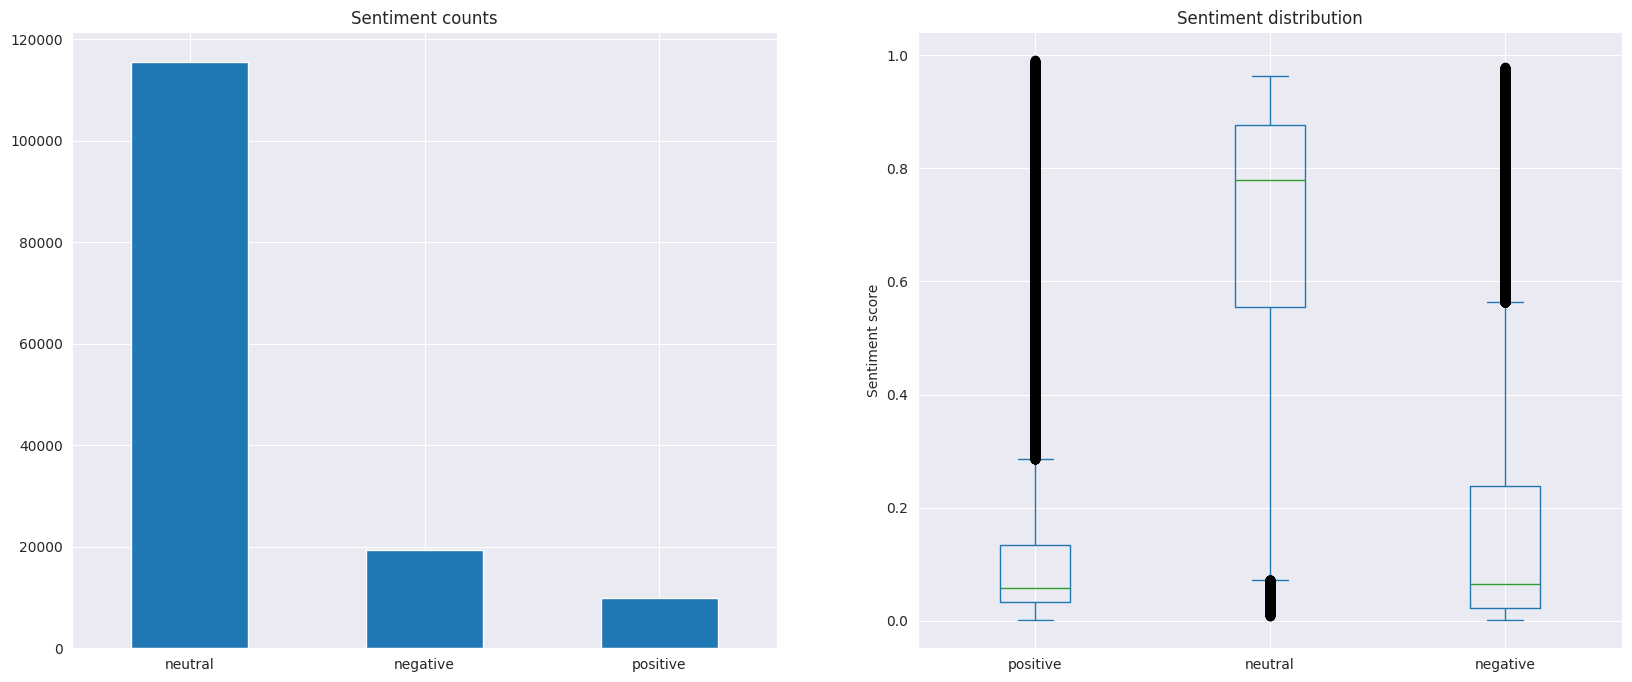

In [8]:
fig, ax = plt.subplots(1, 2, figsize=(20, 8))
data['sa_label'].value_counts().plot(kind='bar', ax=ax[0], title='Sentiment counts', rot=0, xlabel="", )
data[sa_names].plot(kind='box', ax=ax[1], title='Sentiment distribution', rot=0, ylabel="Sentiment score")
plt.show()

# Is there correlations between like, dislikes and sentiment ? => NO

<Axes: >

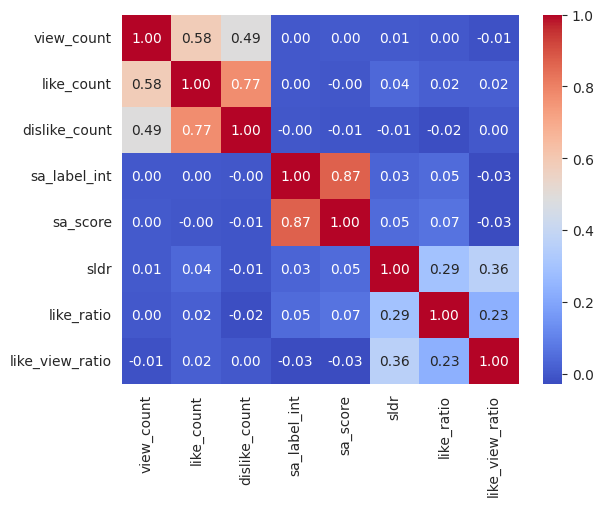

In [9]:
def sldr(like_count, dislike_count):
    if like_count == 0 and dislike_count == 0:
        return None
    if like_count > dislike_count:
        return (like_count+1)/(dislike_count+1)
    else :
        return - (dislike_count+1)/(like_count+1)

data['sldr'] = data.apply(lambda row: sldr(row['like_count'], row['dislike_count']), axis=1)
data['like_ratio'] = data['like_count'] / (data['like_count'] + data['dislike_count'])
data['like_view_ratio'] = data['like_count'] / data['view_count']
corr_cols = ['view_count', 'like_count', 'dislike_count', 'sa_label_int', 'sa_score', 'sldr', 'like_ratio', 'like_view_ratio']
corr_mtx = data[corr_cols].corr()
sns.heatmap(corr_mtx, annot=True, cmap='coolwarm', fmt=".2f")

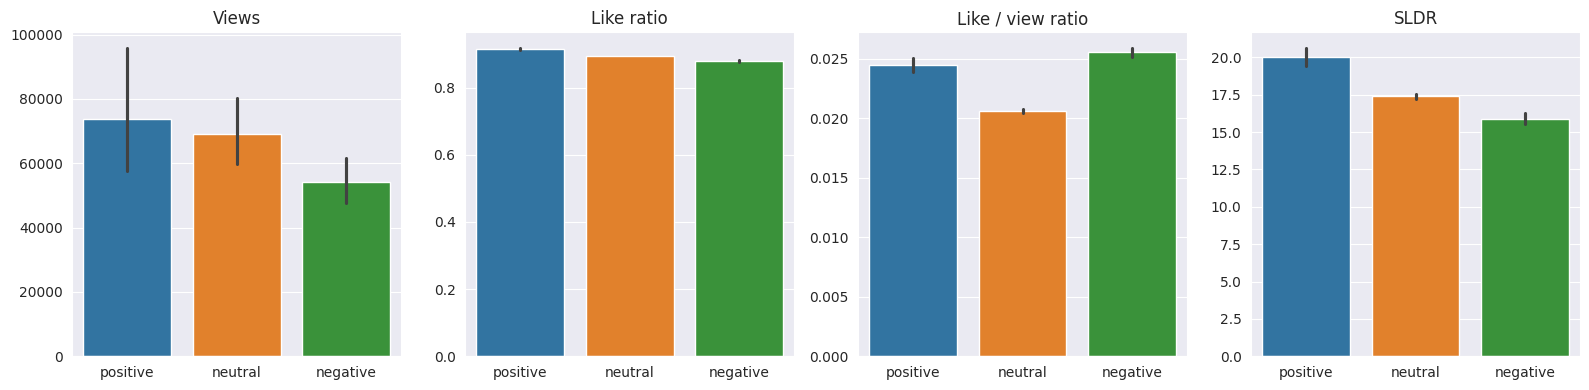

In [42]:
cols = ['view_count', 'like_ratio', 'like_view_ratio', 'sldr']
titles = ['Views', 'Like ratio', 'Like / view ratio', 'SLDR']

fig, ax = plt.subplots(1, 4, figsize=(16, 4))
for i in range(4):
    sns.barplot(ax=ax[i], x="sa_label", y=cols[i], data=data, hue="sa_label", legend=False)
    ax[i].set_title(titles[i])
    ax[i].set_xlabel("")
    ax[i].set_ylabel("")

plt.tight_layout()
plt.show()

# Does the sentiment change over time ?

<Axes: xlabel='upload_year', ylabel='sa_score'>

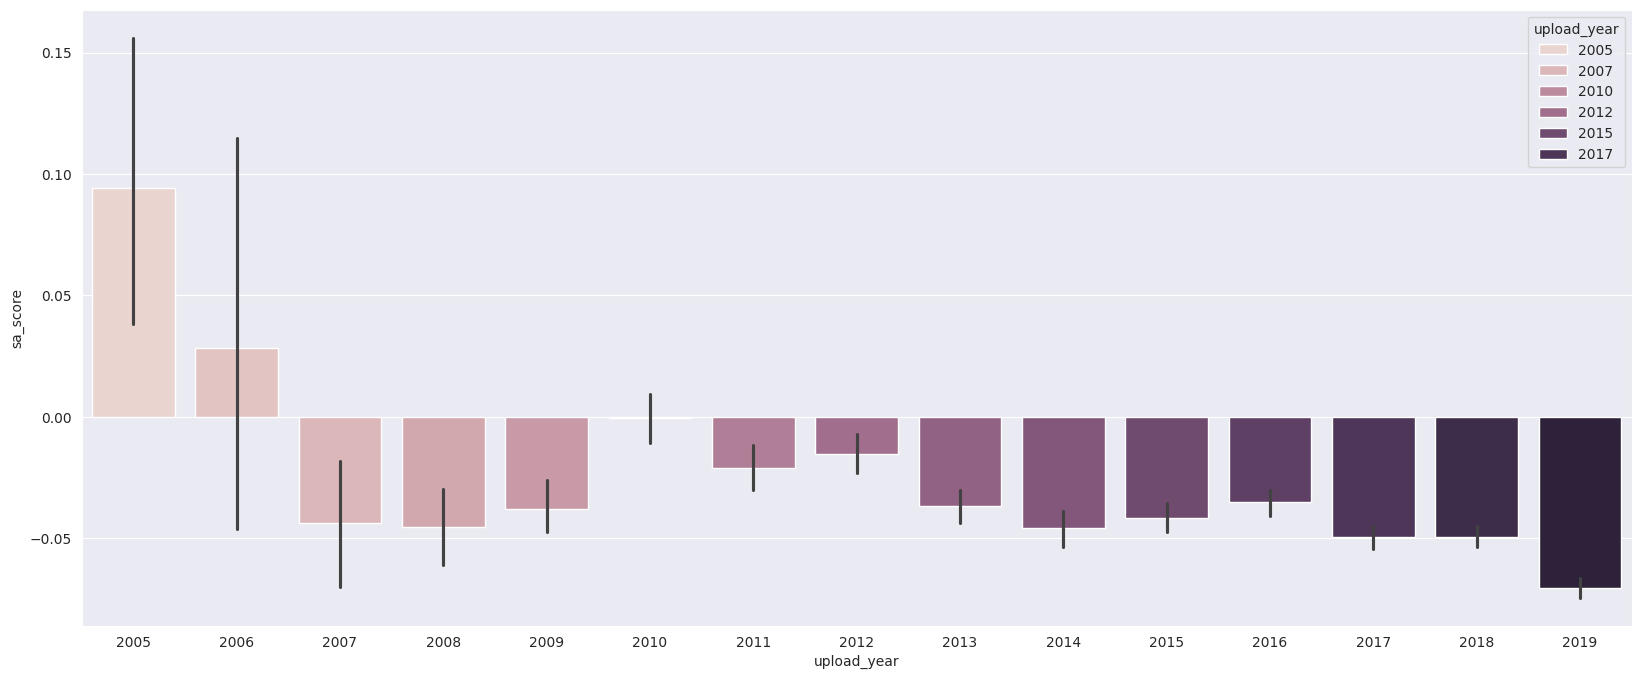

In [12]:
data['upload_date'] = pd.to_datetime(data['upload_date'])
data['upload_year'] = data['upload_date'].dt.year
plt.figure(figsize=(20, 8))
sns.barplot(x="upload_year", hue="upload_year", y="sa_score", data=data)

# Does the sentiment change according to the category ?

/tmp/ipykernel_24535/3530934153.py:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(list(ax.get_xticklabels()), rotation=90)


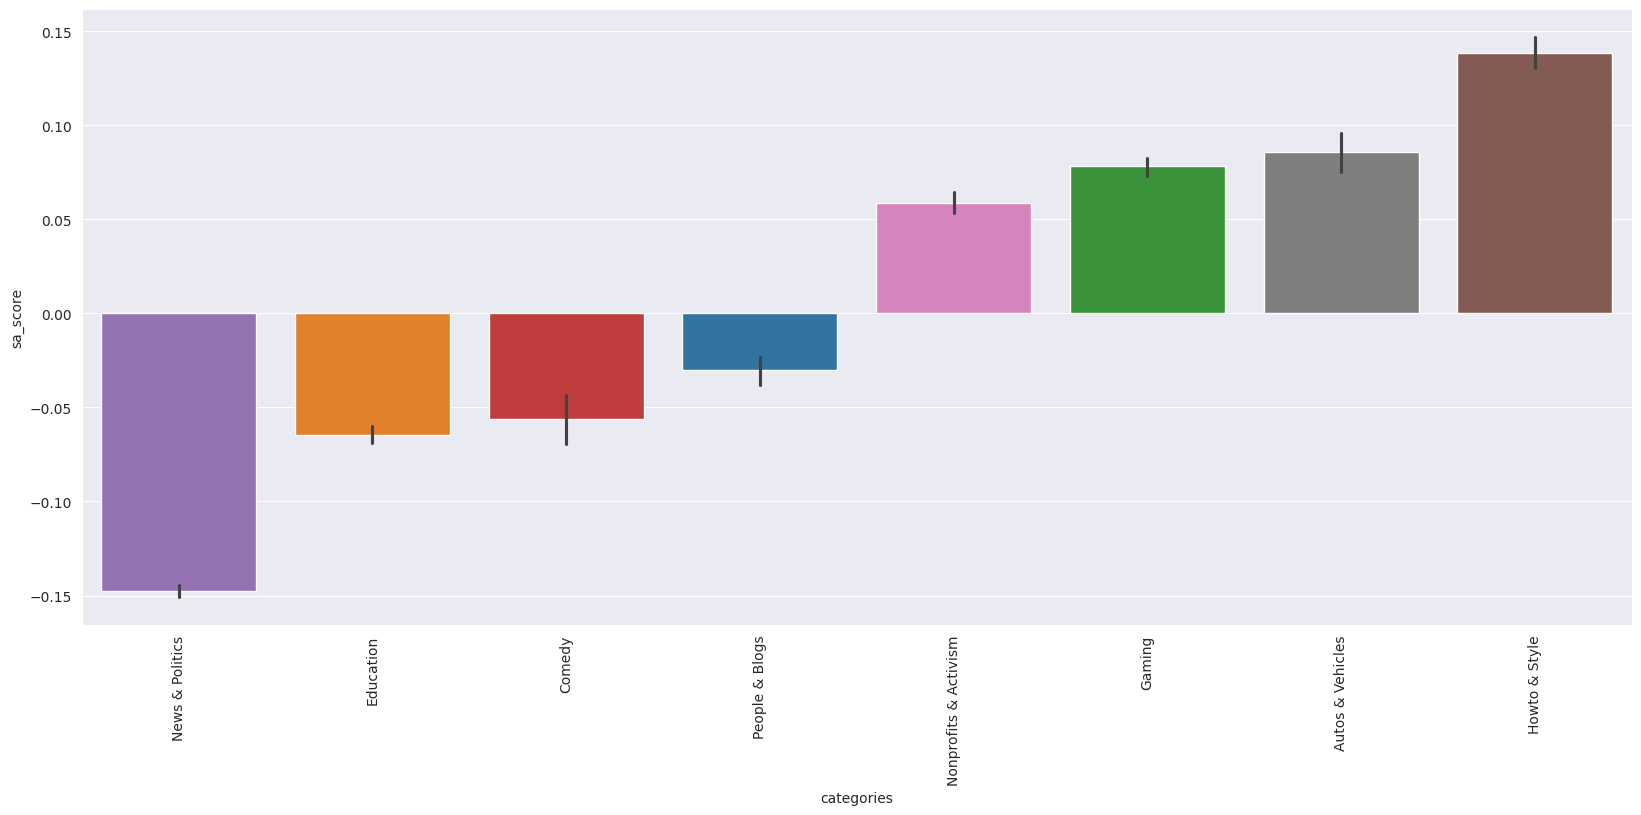

In [13]:
fig, ax = plt.subplots(figsize=(20, 8))
order = list(data.groupby("categories")["sa_score"].mean().sort_values().index)
order.remove('')
order = order[:4] + order[-4:]
data_cat = data[data['categories'].isin(order)]
sns.barplot(x="categories", y="sa_score", data=data_cat, hue="categories",legend=False, ax=ax, order=order)
ax.set_xticklabels(list(ax.get_xticklabels()), rotation=90)
plt.show()

# Analysis negative sentiment

In [14]:
neg_data = data[data['sa_label'] == 'negative'].copy()
neg_data.drop(columns=['sa_label', 'sa_label_int', 'positive', 'neutral'], axis=1, inplace=True)
neg_data.rename(columns={'negative': 'sa_score'}, inplace=True)
neg_data

,display_id,categories,channel_id,crawl_date,description,dislike_count,duration,like_count,tags,title,upload_date,view_count,sa_score,sa_score,sldr,like_ratio,like_view_ratio,upload_year
2,yeVLjOTThEM,Science & Technology,UCzWQYUVCpZqtN93H8RR44Qw,2019-11-03 22:21:47.579992,"Contrary to popular belief, the Amazon forest ...",623.0,272,12140.0,"seeker,science,curiosity,education,explain,lea...",The Amazon Rainforest Doesn’t Produce 20% of O...,2019-09-04,269588.0,0.834153,-0.820135,19.456731,0.951187,0.045032,2019
6,E56zkMYBuwc,Science & Technology,UCzWQYUVCpZqtN93H8RR44Qw,2019-11-03 22:21:14.738173,A mysterious spike in ozone destroying emissio...,189.0,317,7091.0,"seeker,science,curiosity,education,explain,lea...",Here’s Why Repairing the Hole in the Ozone Lay...,2019-06-14,175493.0,0.624012,-0.601930,37.326316,0.974038,0.040406,2019
12,z9uW-8vPpAU,Science & Technology,UCzWQYUVCpZqtN93H8RR44Qw,2019-11-03 22:21:13.114742,Tons of nuclear waste from a secret military o...,1188.0,476,15351.0,"camp century,secret antarctica,antarctica clim...",This Abandoned Nuclear City Is Trapped Under I...,2018-12-30,988484.0,0.601866,-0.585763,12.911690,0.928170,0.015530,2018
15,VhNNXqUX9Nk,Science & Technology,UCzWQYUVCpZqtN93H8RR44Qw,2019-11-03 22:21:28.720672,China just put the brakes on buying up nearly ...,182.0,295,4405.0,"seeker,science,curiosity,education,explain,lea...",Which Countries Make the Most Plastic Waste?,2018-12-05,124357.0,0.716968,-0.694822,24.076503,0.960323,0.035422,2018
16,c_svWhCBG_k,Science & Technology,UCzWQYUVCpZqtN93H8RR44Qw,2019-11-03 22:21:29.366229,Climate change doesn’t just hit our atmosphere...,386.0,271,6241.0,"The swim,ocean,pollution,climate change,climat...","The World’s Seafloor Is Rapidly Dissolving, He...",2018-12-04,162631.0,0.651503,-0.617833,16.129199,0.941753,0.038375,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144953,ISXQBfiqyRU,Gaming,UCrwIl9MrZ8S4DOm06DOvZjA,2019-11-04 21:30:15.088067,I bet that's the first time you've ever seen t...,0.0,257,18.0,"Bad Advice,Advice Channel,Really Bad Advice,FI...","Really Bad Advice #2 - Dating Advice, FIFA Gir...",2016-12-06,119.0,0.883297,-0.875493,19.000000,1.000000,0.151261,2016
144965,VKB_29_PycI,News & Politics,UCrwE8kVqtIUVUzKui2WVpuQ,2019-11-01 23:52:02.573489,,0.0,348,2.0,"political party,Pollution,Canned Air,BJP,08 Fe...",Air Pollution & Canned fresh Air :: Special pr...,2013-02-08,272.0,0.670335,-0.653933,3.000000,1.000000,0.007353,2013
144968,la0KOm0BkxE,News & Politics,UCrwE8kVqtIUVUzKui2WVpuQ,2019-11-01 23:48:44.585886,"September 2, 2015: Prime Minister Shri Narendr...",0.0,81,3.0,"Narendra Modi speech,BJP,Bharatiya Janata Part...",Let us focus on climate justice. We can't let ...,2015-09-04,168.0,0.545286,-0.478403,4.000000,1.000000,0.017857,2015
144973,7R1j20DxdvU,News & Politics,UCrwE8kVqtIUVUzKui2WVpuQ,2019-11-01 23:51:03.266422,,7.0,2275,158.0,"Bharatiya Janata Party,Join BJP,News,Politics,...",Natural disaster in Uttarakhand: Smt. Sushma S...,2013-10-22,15077.0,0.650405,-0.639536,19.875000,0.957576,0.010480,2013
